<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
import numpy as np
import pandas as pd
from sympy import latex, Matrix, plot, solve, linsolve, symbols, eye, zeros
from sympy import lambdify, S, Point, Line
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.vector import Vector, matrix_to_vector, AxisOrienter, express
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 11
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на $\alpha$ градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2]

1) на 20, 30, 45 градусов **по  часовой стрелке**

2) на $\pi/6$ радиан **против часовой стрелки**.

In [2]:
def rotation_matrix(angle, radians=True, counterclockwise=True):
    if not radians:
        angle = sympy.rad(angle)

    if not counterclockwise:
        angle = -angle

    cos_a = sympy.cos(angle)
    sin_a = sympy.sin(angle)
    return sympy.Matrix([[cos_a, -sin_a], [sin_a, cos_a]])

vec = sympy.Matrix([1, 2])

angles = [20, 30, 45]
for angle in angles:
  display(rotation_matrix(angle, radians=False, counterclockwise=False) * vec)

angle = sympy.pi / 6
display(rotation_matrix(angle) * vec)

Matrix([
[ 2*sin(pi/9) + cos(pi/9)],
[-sin(pi/9) + 2*cos(pi/9)]])

Matrix([
[ sqrt(3)/2 + 1],
[-1/2 + sqrt(3)]])

Matrix([
[3*sqrt(2)/2],
[  sqrt(2)/2]])

Matrix([
[-1 + sqrt(3)/2],
[ 1/2 + sqrt(3)]])

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [11]:
A = sympy.Matrix([
    [-34, 20, -5],
    [-40, 56, -20],
    [20, -8, 50]
])

l = sympy.Symbol("labmda")
lambdas = solve((A - l * eye(3)).det(), l)
display(lambdas)

for eigval, mult, vecs in A.eigenvects():
    display(Latex(f'{latex(eigval)} - {mult}, {latex(vecs)}'))

    assert eigval in lambdas
    for vec in vecs:
      assert A * vec == eigval * vec



[-24, 40, 56]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из Задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.Вывести на экран матрицу перехода к новому базису и матрицу оператора в новом базисе, а также собственные числа и собственные векторы в исходном и новом базисе.


In [14]:
B = sympy.Matrix([
    [1, 1, 1],
    [0, 5, 3],
    [1, 6, 0]
])

P = B.inv()
display(P)

A_new = P * A * B
display(A_new)

for eigval, mult, vects in A.eigenvects():
    display(Latex(f'{latex(eigval)} - {mult}, {latex(vecs)}'))

for eigval, mult, vects in A_new.eigenvects():
    display(Latex(f'{latex(eigval)} - {mult}, {latex(vecs)}'))

Matrix([
[ 9/10, -3/10, 1/10],
[-3/20,  1/20, 3/20],
[  1/4,   1/4, -1/4]])

Matrix([
[-101/10, 122/5, -77/5],
[ 267/20, 213/5, 19/10],
[ -169/4,   -31,  79/2]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 4.
Считать из файла 'sem_11_task_4.xlsx' матрицу линейного оператора.
Построить матрицу оператора в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить (визуально) диагональные элементы с собственными числами. Вывести на экран матрицу перехода и матрицу линейного оператора в новом базисе, записать обе матрицы на листы 'P' и 'Anew' 'sem_11_task_4_ans.xlsx'.

**Указание:** для записи матрицы sympy в файл xlsx сначала нужно преобразовать матрицу в список с помощью метода матриц tolist, затем на основе полученного списка составить DataFrame.

За счет необязательных аргументов header и index функции to_excel обеспечить запись матриц в файл без подписей строк и столбцов.

In [15]:
from google.colab import files
uploaded = files.upload()

Saving sem_11_task_5.xlsx to sem_11_task_5.xlsx
Saving sem_11_task_4.xlsx to sem_11_task_4.xlsx


In [20]:
df = pd.read_excel("sem_11_task_4.xlsx", header=None)
A = sympy.Matrix(df.values)

eigenvectors = A.eigenvects()
P = sympy.Matrix.hstack(*[vect for eigval, mult, vects in eigenvectors for vect in vects])
display(P)

A_new = P.inv() * A * P
display(A_new)

with pd.ExcelWriter('sem_11_task_4_ans.xlsx') as writer:
    pd.DataFrame(list(P)).to_excel(writer, sheet_name='P', header=False, index=False)
    pd.DataFrame(list(A_new)).to_excel(writer, sheet_name='A_new', header=False, index=False)

Matrix([
[9, 5, 8],
[6, 3, 5],
[1, 1, 1]])

Matrix([
[-4, 0, 0],
[ 0, 2, 0],
[ 0, 0, 8]])

### Задание 5.
Описать функцию от аргументов $a11$, $a12$, $a21$, $a22$, которая с помощью функций  sympy находит собственные числа линейного оператора с матрицей
$\left(\begin{matrix}a_{11} & a_{12}\\ a_{21} & a_{22}\end{matrix}\right)$ и возвращает максимальный модуль собственного числа, если это число вещественное. В случае комплексных корней характеристического уравнения функция возвращает -1.

Вывести на экран максимальное по модулю собственное число для каждой из матриц, состоящих из  элементов $a11$, $a12$, $a21$, $a22$ файла 'sem_11_task_5.xlsx'.

In [29]:
def max_real_eigenvalue(a11, a12, a21, a22):
    A = sympy.Matrix([[a11, a12], [a21, a22]])
    reals = [ev for ev in A.eigenvals() if ev.is_real]

    if reals != []:
        return max(abs(ev) for ev in reals)
    else:
        return -1

df = pd.read_excel("sem_11_task_5.xlsx", header=0, index_col=0)

for a11, a12, a21, a22 in df.values:
  display(max_real_eigenvalue(a11, a12, a21, a22))


1

11

-1

16

-1

18

18

### Задание 6*.
Описать функцию с аргументами $a$, $slope$, где $a$ - горизонтальная координата точки на оси  $OX$, $slope$ - тангенс угла наклона прямой, проходящей через точку $A(a, 0)$. Функция возвращает вертикальную координату точки пересечения прямой с осью $OY$ (при $a = -3$, $slope = 2$ должно получиться 6).

С помощью lambdify получить функцию - "двойник" для работы с объектами numpy, затем при помощи этой функции и matplotlib.pyplot построить график зависимости вертикальной координаты точки пересечения от $a$, если $a=np.linspace(-5, 5)$, $slope = 2$, затем график при  $slope = np.linspace(-2, 1)$,  $a = -2$.

# Задание 7*

Для оператора поворота на угол $\alpha$  найти значения  угла $\alpha$, при которых у оператора есть собственные числа и собственные векторы, вывести на экран такие значения $\alpha$ и соответствующие  собственные числа и собственные векторы для  $\alpha$ от 0 до $5\pi$.

###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.


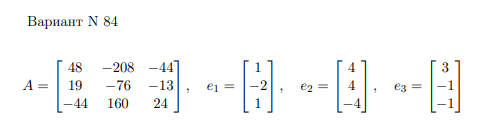

In [33]:
A = sympy.Matrix([
    [48, -208, -44],
    [19, -76, -13],
    [-44, 160, 24]
])

e1 = sympy.Matrix([1, -2, 1])
e2 = sympy.Matrix([4, 4, -4])
e3 = sympy.Matrix([3, -1, -1])

eigenvectors = A.eigenvects()
display(Latex(latex(eigenvectors)))

P = sympy.Matrix.hstack(e1, e2, e3)
display(P)
A_new = P.inv() * A * P
display(A_new)

P = sympy.Matrix.hstack(*[vect for eigval, mult, vects in eigenvectors for vect in vects])
display(P)
A_new = P.inv() * A * P
display(A_new)

<IPython.core.display.Latex object>

Matrix([
[ 1,  4,  3],
[-2,  4, -1],
[ 1, -4, -1]])

Matrix([
[-102,   96, -90],
[  24,  -32,  24],
[ 142, -144, 130]])

Matrix([
[  -1,   -2,  -4/3],
[-1/2, -3/4, -5/12],
[   1,    1,     1]])

Matrix([
[-12,  0,  0],
[  0, -8,  0],
[  0,  0, 16]])